In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline

In [4]:
root_dir = '/home/alex/Documents/capstone-ml/'
files = ['data_2009_1d.csv','data_2010_1d.csv','data_2011_1d.csv','data_2012_1d.csv','data_2013_1d.csv','data_2014_1d.csv',
         'data_2015_1d.csv','data_2016_1d.csv','data_2017_1d.csv']

# read the data
ask_data = pd.DataFrame()
for file in files:
    print("Read in "+file)
    temp = pd.read_csv(root_dir+file, low_memory=True, usecols=['Date', 'open', 'high', 'low', 'close'], index_col = ['Date'])
    ask_data = pd.concat([ask_data, temp])
    del(temp)

Read in data_2009_1d.csv
Read in data_2010_1d.csv
Read in data_2011_1d.csv
Read in data_2012_1d.csv
Read in data_2013_1d.csv
Read in data_2014_1d.csv
Read in data_2015_1d.csv
Read in data_2016_1d.csv
Read in data_2017_1d.csv


In [5]:
# remove the NaN values from the ask_data and save it to itself (inplace=true)
ask_data.dropna(inplace = True)
# check the length
len(ask_data)

2266

In [6]:
# split the dataset in a training- and test dataset
train, test = ask_data['close'][:-500], ask_data['close'][-500:]

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


(0, 200)

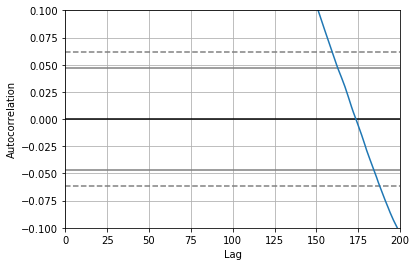

In [7]:
# the idea here is the figure out the AR and MA parameters for the ARIMA model,
# in first approximation choose the interception with the upper dashed line (confidence level)
# hence my computer can't do it with about AR = 150, I chose a well known 5
ax1 = autocorrelation_plot(train)
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlim(0,200)

In [8]:
# apply a rolling ARIMA model as introduced in [https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/]

# create a 1d list from the train data and test data
history = [x for x in train]
test = [x for x in test]
# declare predictions explicitly as a list
predictions = list()
for t in range(len(test)):
    # create the model
    model = ARIMA(history, order=(5,1,0))
    # fit the history/training data
    model_fit = model.fit(disp=0)
    # forecast next days close
    output = model_fit.forecast()
    # get the forecast value from the output
    yhat = output[0]
    # add the prediction to the list
    predictions.append(yhat)
    # extract the next datapoint from the testdata
    obs = test[t]
    # append that datapoint to the training data for the next round/roll
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# create a 1d list of predictions ...
pred = [predictions[x][0] for x in range(len(predictions))]

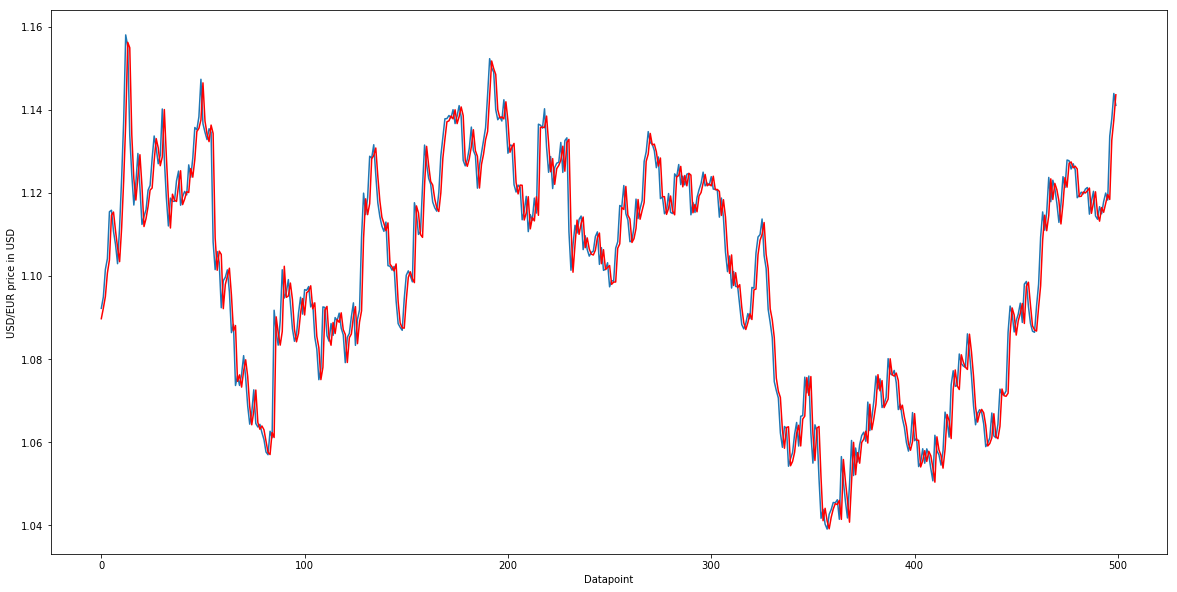

In [12]:
# plot the real and predicted data
plt.figure(figsize = (20,10))
plt.xlabel("Datapoint")
plt.ylabel("USD/EUR price in USD")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [12]:
# print the metrics for the benchmark / ARIMA model
print('R2 Score for the ARIMA model: ',r2_score(test, pred))
print('MAE for the ARIMA model: ',mean_absolute_error(test, pred))
print('MSR for the ARIMA model: ',mean_squared_error(test, pred))

R2 Score for the ARIMA model:  0.950398282076
MAE for the ARIMA model:  0.00447924746445
MSR for the ARIMA model:  3.59332567351e-05


In [13]:
# just nice to know, get the correlation between the predicted and real data
from scipy.stats.stats import pearsonr
pearsonr(pred, test)

(0.97515498340927953, 0.0)